In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import yfinance as yf
import pandas_ta as ta


In [2]:
from keras.models import Sequential

In [3]:
from keras.layers import *

In [4]:
df = yf.download(tickers = 'TATAMOTORS.NS', start = '2018-11-20',end = '2023-11-28')

[*********************100%%**********************]  1 of 1 completed


In [5]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-20,248.175064,248.175064,240.075058,240.975067,235.856064,3453657
2018-11-21,240.000061,240.000061,234.937561,235.612564,230.607452,3471908
2018-11-22,236.250061,239.100052,229.500061,230.325058,225.432297,4119744
2018-11-26,227.550049,239.925064,226.987549,238.837555,233.763962,9328557
2018-11-27,237.637558,241.725067,233.250061,234.037552,229.065918,5729117
2018-11-28,235.462555,236.662552,231.937561,232.725052,227.781311,8463352
2018-11-29,235.500061,237.487564,232.200058,236.175064,231.158020,3896692
2018-11-30,236.287552,244.800064,235.275055,243.487564,238.315170,8495625
2018-12-03,243.750061,247.125061,242.287567,246.187561,240.957809,3557631


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-20,393.200012,401.100006,393.200012,400.200012,400.200012,4305248
2023-11-21,402.600006,402.600006,400.049988,400.649994,400.649994,2720124
2023-11-22,402.500000,402.600006,399.100006,400.250000,400.250000,2659291
2023-11-23,400.500000,405.000000,400.500000,402.500000,402.500000,4838680
2023-11-24,402.500000,403.500000,395.549988,396.000000,396.000000,3125283


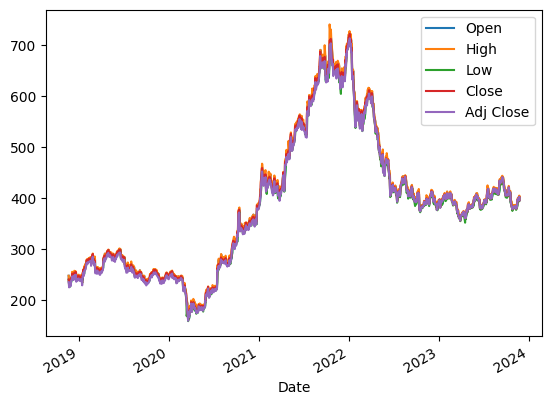

In [7]:
df.iloc[:,:-1].plot()
plt.show()

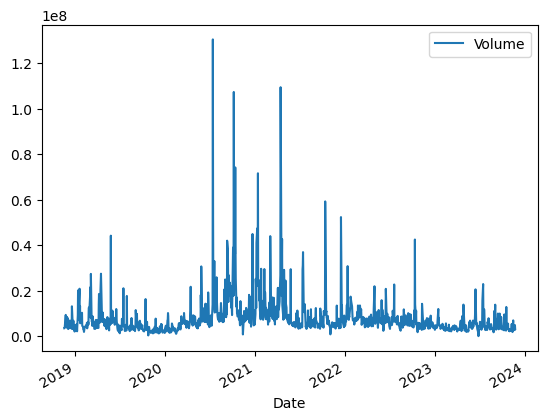

In [8]:
df.iloc[:,-1].plot()
plt.legend()
plt.show()


C:\Users\alokk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


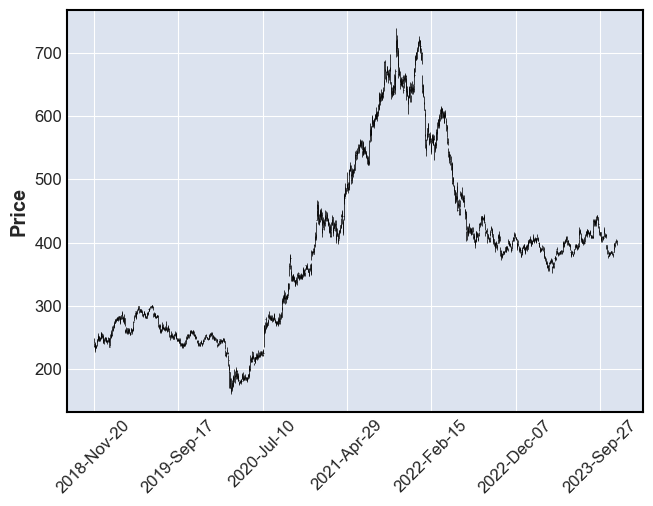

In [9]:
mpf.plot(df)

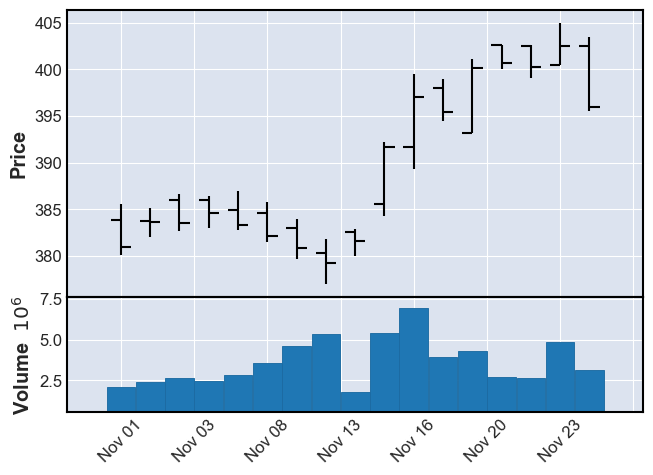

In [10]:
mpf.plot(df['2023-11':'2023-12'], volume=True)

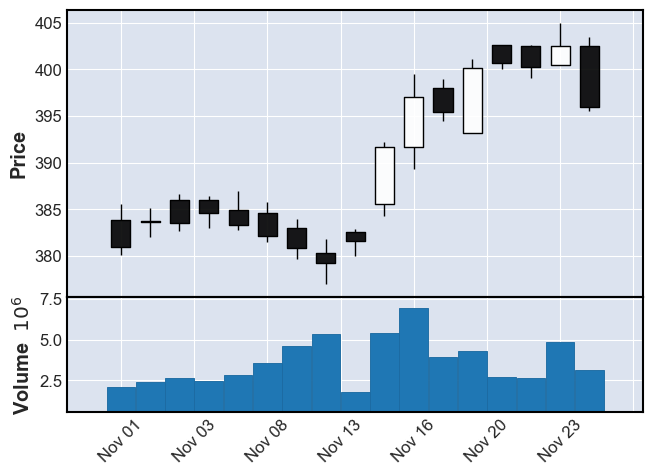

In [11]:
mpf.plot(df['2023-11':'2023-12'], type='candle', volume=True)

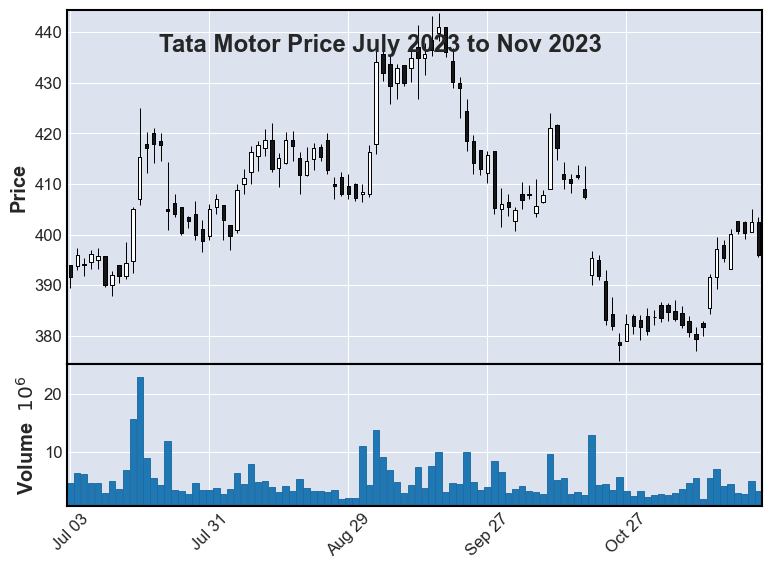

In [12]:
 mpf.plot(df['2023-07':'2023-11'], type='candle',title= 'Tata Motor Price July 2023 to Nov 2023', volume = True, tight_layout = True)

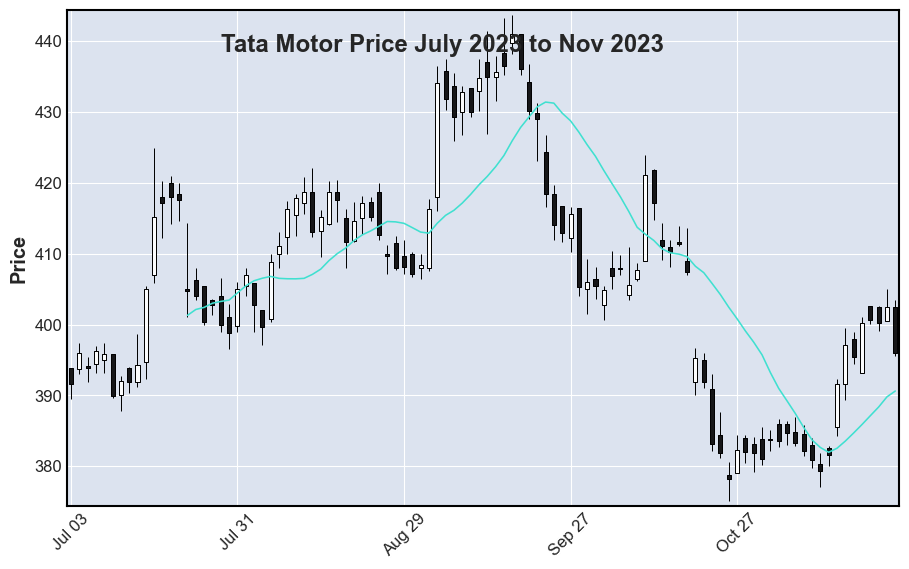

In [13]:
mpf.plot(df['2023-07':'2023-11'], figratio=(20,12), type='candle', title= 'Tata Motor Price July 2023 to Nov 2023', mav=15, tight_layout = True)

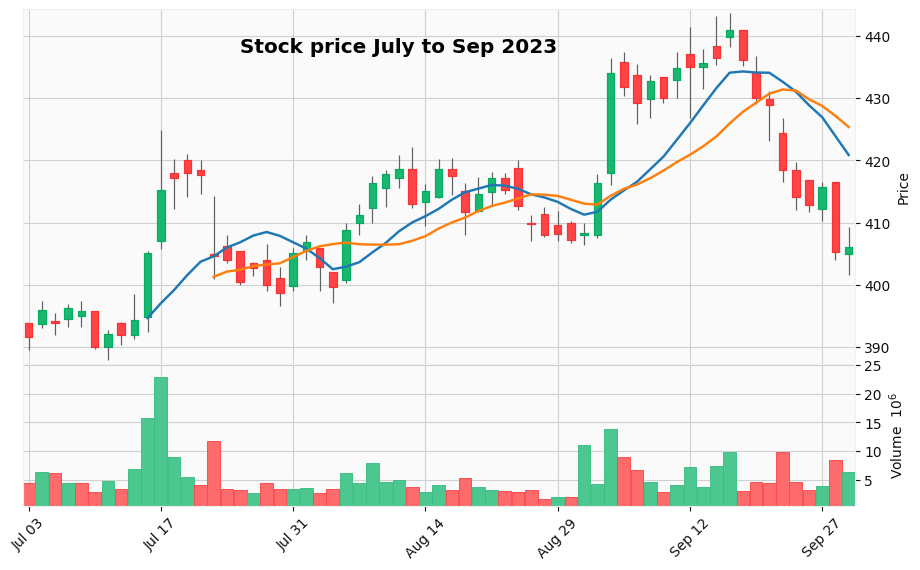

In [14]:
mpf.plot(df['2023-07':'2023-09'],figratio=(10,6),type='candle', title='Stock price July to Sep 2023', mav=(10,15), volume = True, tight_layout = True, style = 'yahoo')

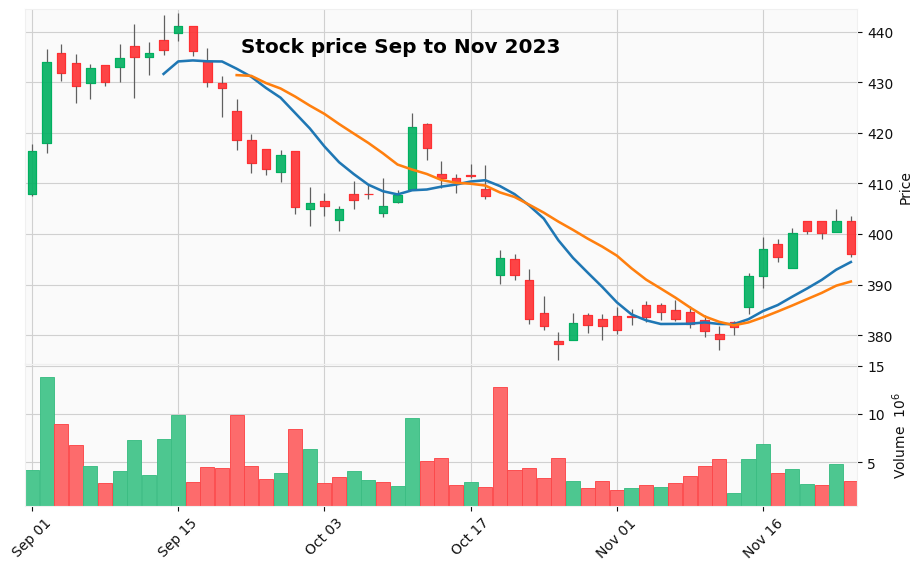

In [15]:
mpf.plot(df['2023-09':'2023-11'],figratio=(10,6),type='candle', title='Stock price Sep to Nov 2023', mav=(10,15), volume = True, tight_layout = True, style = 'yahoo')

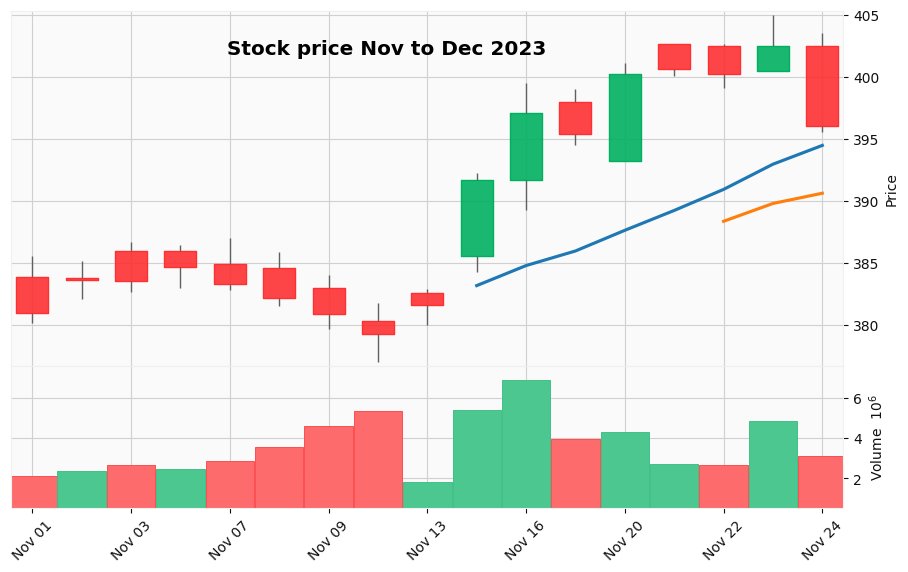

In [16]:
mpf.plot(df['2023-11':'2023-12'],figratio=(10,6),type='candle', title='Stock price Nov to Dec 2023', mav=(10,15), volume = True, tight_layout = True, style = 'yahoo')

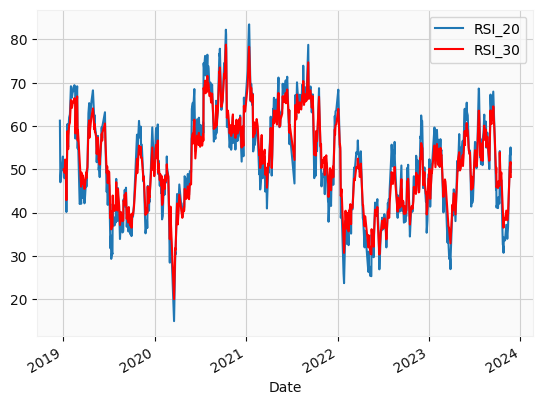

In [17]:
#Calculate the RSI with a lookback period of 20.
RSI20= ta.rsi(df.Close, length=20)
RSI30= ta.rsi(df.Close, length=30)
RSI20.plot()
RSI30.plot(color = 'red')
plt.legend()
plt.show()

In [18]:
df['RSI'] = ta.rsi(df.Close, length=20)

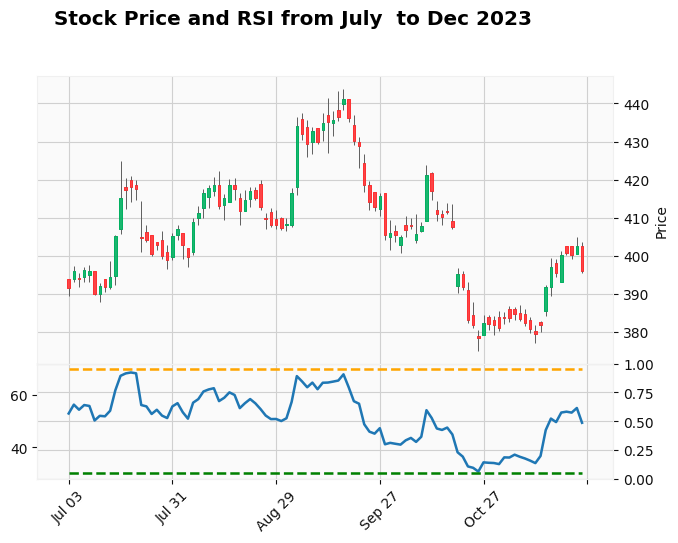

In [19]:
mpf.plot(df['2023-07':'2023-12'], type='candle', style='yahoo',
         title= 'Stock Price and RSI from July  to Dec 2023',
         addplot=[mpf.make_addplot(df['RSI']['2023-07':'2023-12'], panel=1, secondary_y=True),
                  mpf.make_addplot([70] * len(df['2023-07':'2023-12']), panel=1, secondary_y=True, color='orange', linestyle='--'),
                  mpf.make_addplot([30] * len(df['2023-07':'2023-12']), panel=1, secondary_y=True, color='green', linestyle='--')
                  ])

C:\Users\alokk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


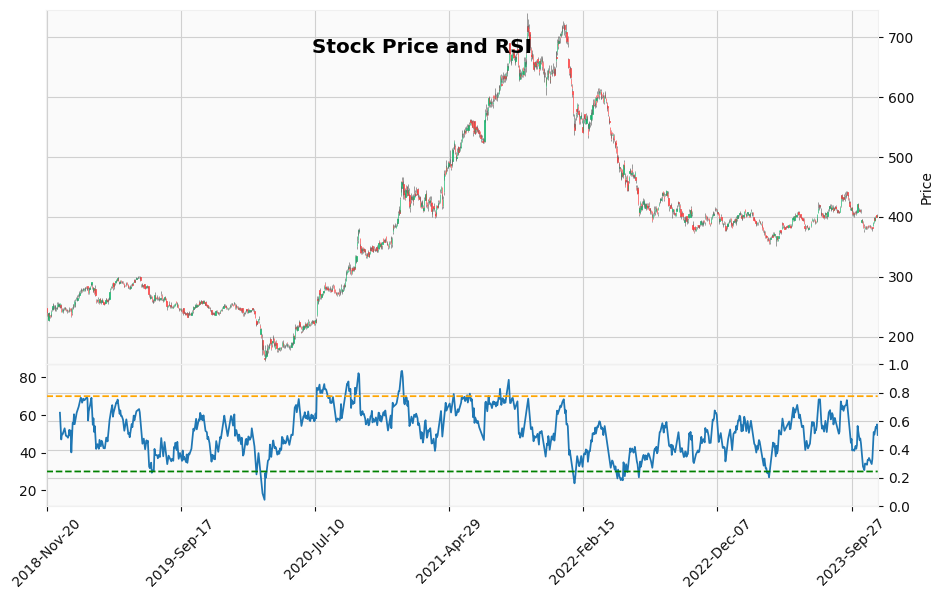

In [20]:
fig, rs = mpf.plot(df, type='candle', style='yahoo', figratio=(5,3),
         title= 'Stock Price and RSI', tight_layout = True,
         addplot=[mpf.make_addplot(df['RSI'], panel=1, secondary_y=True),
                  mpf.make_addplot([70] * len(df), panel=1, secondary_y=True, color='orange', linestyle='--'),
                  mpf.make_addplot([30] * len(df), panel=1, secondary_y=True, color='g', linestyle='--')],
        returnfig = True
                   )
rs[1].annotate('Overbought', xy=(df.index[-1], 70), xytext=(df.index[-1], 70), textcoords='offset points',
                  color='r', ha='right', va='bottom', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

rs[1].annotate('Oversold', xy=(df.index[-1], 30), xytext=(df.index[-1], 30),  textcoords='offset points',
                  color='r', ha='right', va='top', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

mpf.show()

In [21]:
#calculates the EMA with a smoothing period of 20.
df['EMAF']= ta.ema(df.Close, length=20)

In [22]:
# calculates the EMA with a smoothing period of 100.
df['EMAM']=ta.ema(df.Close, length=100)

In [23]:
# calculates the EMA with a smoothing period of 150.
df['EMAS']=ta.ema(df.Close, length=200)

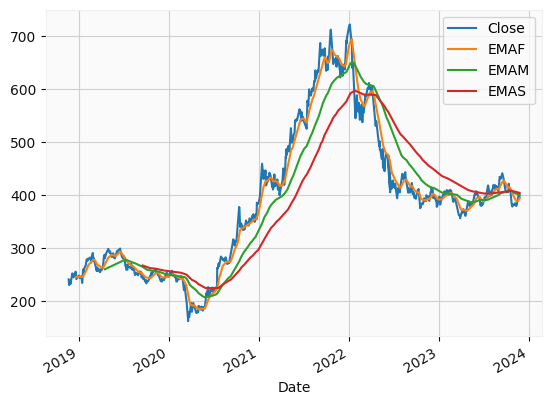

In [24]:
df['Close'].plot()
df['EMAF'].plot()
df['EMAM'].plot()
df['EMAS'].plot()
plt.legend()

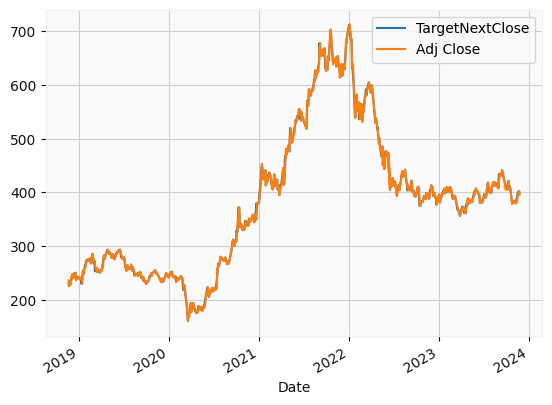

In [25]:
df['Target'] = df['Adj Close']- df['Open']
df['Target'] = df['Target'].shift(-1)
df['TargetNextClose'] = df['Adj Close'].shift(-1)
df['TargetNextClose'].plot()
df['Adj Close'].plot()
plt.legend()

<AxesSubplot:xlabel='Date'>

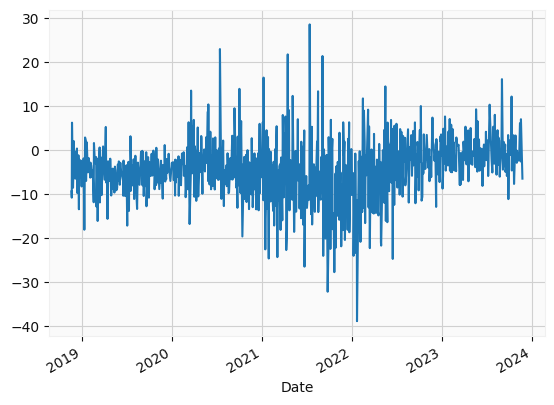

In [26]:
df['Target'].plot()

In [27]:
df['TargetClass'] = [1 if df.Target[i]>0 else 0 for i in range(len(df))]

<AxesSubplot:ylabel='TargetClass'>

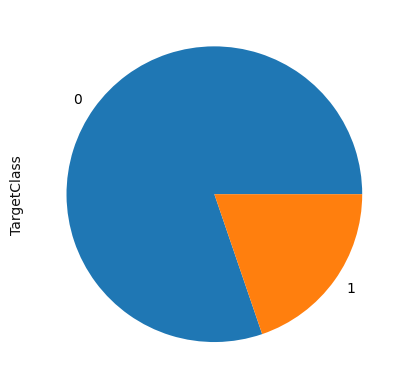

In [28]:
df['TargetClass'].value_counts().plot(kind='pie', )


In [29]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose,TargetClass
Date,,,,,,,,,,,,,
2023-11-20,393.200012,401.100006,393.200012,400.200012,400.200012,4305248,53.289015,390.830962,400.912913,404.260579,-1.950012,400.649994,0
2023-11-21,402.600006,402.600006,400.049988,400.649994,400.649994,2720124,53.621042,391.766108,400.907707,404.224653,-2.250000,400.250000,0
2023-11-22,402.500000,402.600006,399.100006,400.250000,400.250000,2659291,53.266763,392.574098,400.894683,404.185104,2.000000,402.500000,1
2023-11-23,400.500000,405.000000,400.500000,402.500000,402.500000,4838680,55.026206,393.519422,400.926471,404.168337,-6.500000,396.000000,0
2023-11-24,402.500000,403.500000,395.549988,396.000000,396.000000,3125283,49.373569,393.755668,400.828918,404.087060,NaN,NaN,0


Note: you may need to restart the kernel to use updated packages.


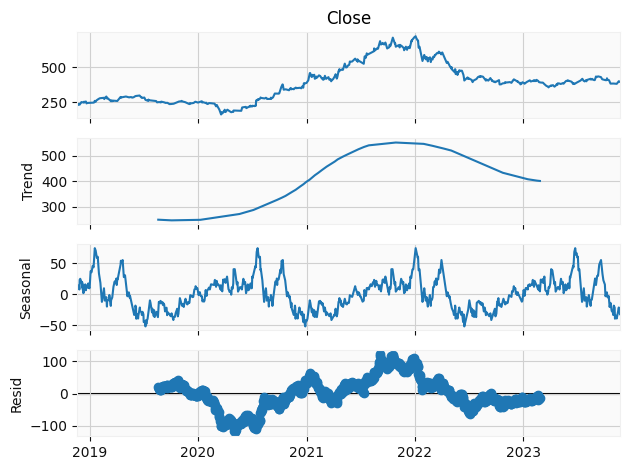

In [30]:
%pip install statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose
decompose= seasonal_decompose(df.Close, period=365)
decompose.plot()
plt.show()

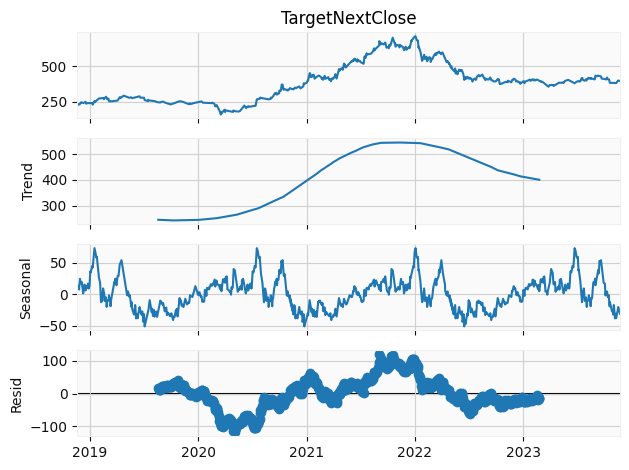

In [31]:
decompose= seasonal_decompose(df.TargetNextClose.dropna(), period=365)
decompose.plot()
plt.show()


In [32]:
#Augmented Dicker Fuller(ADFuller) Test for checking stationarity
from statsmodels.tsa.stattools import adfuller
def adfuller_prob(df,col):
  ts= df[col].dropna()
  ts_prob = adfuller(ts)[1]
  print(f'Probability  is {ts_prob}')
  if ts_prob < 0.05:
    print('TS is stationary')
  else:
    print(f'TS = {col} is non-stationary')
    ts1 = df[col].diff().dropna()
    ts1_prob = adfuller(ts1)[1]
    print(f'Probability of 1st difference is {ts1_prob}')
    if ts1_prob < 0.05:
      print(f'TS{col} of diff1 is stationary')

adfuller_prob(df, col='Close')

Probability  is 0.633746472194807
TS = Close is non-stationary
Probability of 1st difference is 0.0
TSClose of diff1 is stationary


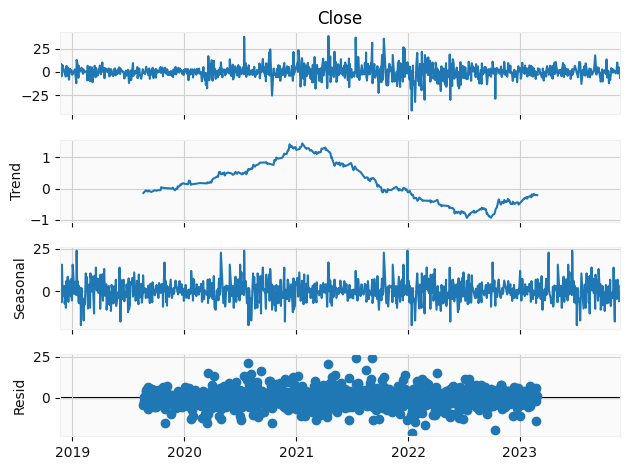

In [33]:
seasonal_decompose(df.Close.diff().dropna(), period=365).plot()
plt.show()

In [34]:
adfuller_prob(df, col='Target')

Probability  is 0.015580441304322715
TS is stationary


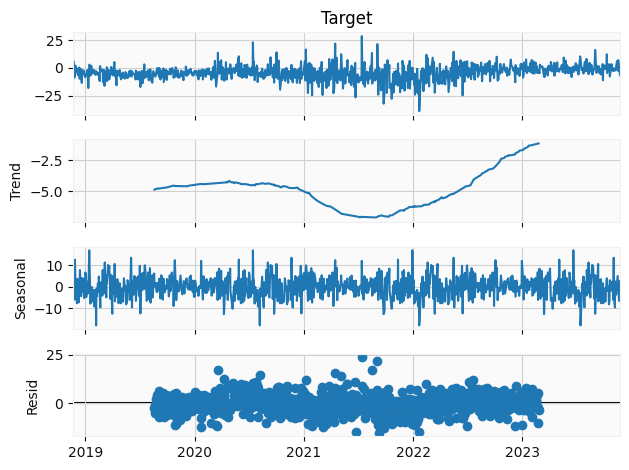

In [35]:
seasonal_decompose(df.Target.dropna(), period=365).plot()
plt.show()

In [36]:
df1 = df.dropna(inplace= True)
df1= df.reset_index()
df1= df1.drop(['Volume','Close'],axis=1)
pd.set_option('display.max_columns', None)

df1.head()

,Date,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose,TargetClass
0,2019-09-16,245.100006,247.850006,244.100006,242.533798,39.815138,252.079673,265.075544,267.244648,-7.311707,239.638290,0
1,2019-09-17,246.949997,247.399994,243.699997,239.638290,37.547941,251.324465,264.661176,267.014850,-5.614441,239.785553,0
2,2019-09-18,245.399994,245.949997,243.300003,239.785553,37.737715,250.655469,264.257985,266.788832,-8.212723,237.037277,0
3,2019-09-19,245.250000,245.850006,240.250000,237.037277,35.611546,249.783519,263.807332,266.537202,-0.494965,241.405029,0
4,2019-09-20,241.899994,248.699997,240.500000,241.405029,41.157670,249.418422,263.453721,266.332354,-12.772995,234.927002,0


In [37]:
df1.Date.tail(1)


1039   2023-11-23
Name: Date, dtype: datetime64[ns]

In [38]:
last_day = df1.Date.tail(1).values
print('Last Date =', last_day)

Last Date = ['2023-11-23T00:00:00.000000000']


In [39]:
df1.shape

(1040, 12)

In [40]:
#excluding date and target_class
final_df = df1.iloc[:,1:-1]
final_df.head()

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetNextClose
0,245.100006,247.850006,244.100006,242.533798,39.815138,252.079673,265.075544,267.244648,-7.311707,239.638290
1,246.949997,247.399994,243.699997,239.638290,37.547941,251.324465,264.661176,267.014850,-5.614441,239.785553
2,245.399994,245.949997,243.300003,239.785553,37.737715,250.655469,264.257985,266.788832,-8.212723,237.037277
3,245.250000,245.850006,240.250000,237.037277,35.611546,249.783519,263.807332,266.537202,-0.494965,241.405029
4,241.899994,248.699997,240.500000,241.405029,41.157670,249.418422,263.453721,266.332354,-12.772995,234.927002


In [41]:
#split data into train test sets
splitlimit = int(len(final_df)*0.8)
print('split limit :', splitlimit)
train_data, test_data = final_df[:splitlimit], final_df[splitlimit:]
print('Shape of train', train_data.shape )
print('Shape of test', test_data.shape )

split limit : 832
Shape of train (832, 10)
Shape of test (208, 10)


Sacling the Data
Scaling is important when working with Long Short-Term Memory (LSTM) networks for predicting stock
prices or any time series data. LSTMs are a type of recurrent neural network (RNN) that are well-suited for
sequential data like stock prices.


In [42]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_train = sc.fit_transform(train_data)
sc_test = sc.transform(test_data)
print('==='*25)
print('Scaled Trained data')
print('==='*25)
print(sc_train)
print('==='*25)
print('Scaled Test data')
print('==='*25)
print(sc_test)
print('==='*25)

Scaled Trained data
[[-1.12688531 -1.13056083 -1.11061003 ... -0.95423071 -0.33387742
  -1.14557254]
 [-1.11454003 -1.13353976 -1.11331079 ... -0.95596954 -0.0903143
  -1.14457745]
 [-1.12488345 -1.14313827 -1.11601146 ... -0.95767977 -0.46317617
  -1.16314809]
 ...
 [-0.15994484 -0.11675841 -0.13227976 ...  0.31819328  0.04466668
  -0.09322123]
 [-0.09287969 -0.10980784 -0.10020889 ...  0.31525287  1.24767998
  -0.04704802]
 [-0.103223   -0.09789231 -0.0715139  ...  0.31285747  0.75969539
  -0.0457    ]]
Scaled Test data
[[-0.07919959 -0.0968994  -0.06645008 ...  0.31050096  0.5158301
  -0.04738518]
 [-0.06952364 -0.0876319  -0.04923317 ...  0.30814907  0.83017699
  -0.02143386]
 [-0.05851276 -0.07207564 -0.04113097 ...  0.30611046  0.45707208
  -0.0173795 ]
 ...
 [-0.07586301 -0.1061669  -0.05767287 ...  0.08226816  0.39249387
  -0.06028773]
 [-0.07653037 -0.1061669  -0.06408692 ...  0.0819689   1.00238263
  -0.04508404]
 [-0.08987669 -0.09027973 -0.05463449 ...  0.08184203 -0.217394

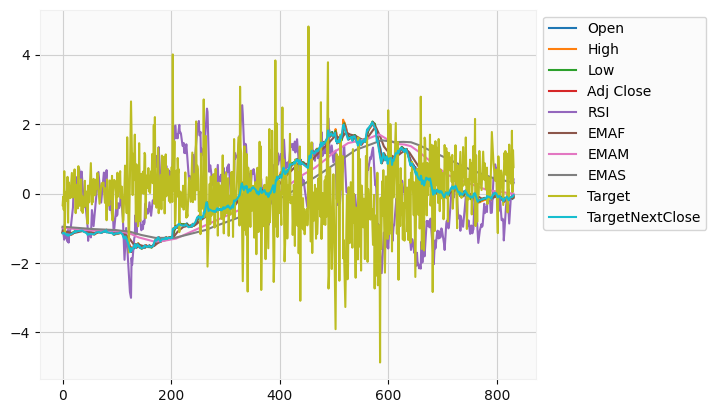

In [43]:
sc_train_df = pd.DataFrame(sc_train, columns = list(final_df))
sc_test_df = pd.DataFrame(sc_test, columns = list(final_df))
sc_train_df.plot()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [44]:
# Next Close prediction
def x_y_split(df, n_target,  n_past=14):
 x = np.array([df.iloc[i-n_past:i,:8].copy() for i in range(n_past,len(df))])
 yi = np.array(df.iloc[n_past:,n_target])
 y=np.reshape(yi,(len(yi),1))
 return x,y

x_train, y_train = x_y_split(sc_train_df , -1, 14)  # -1 is for last column of the dataset which is 'TargetNextClose'
x_test, y_test = x_y_split(sc_test_df ,n_target= -1, n_past=14)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((818, 14, 8), (194, 14, 8), (818, 1), (194, 1))

In [45]:
model =Sequential([
    LSTM(150, activation ='relu', input_shape = (x_train.shape[1],x_train.shape[2]),return_sequences= True),
    LSTM(32, activation ='relu', return_sequences = False),
    Dense(64, activation ='relu'),
    Dense(32, activation ='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation ='linear')
])
model.compile(optimizer ='adam', loss ='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 150)           95400     
                                                                 
 lstm_1 (LSTM)               (None, 32)                23424     
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 123,049
Trainable params: 123,049
Non-trai

In [46]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.1,verbose=1)

Epoch 1/20
12/12 [==============================] - 3s 48ms/step - loss: 0.5694 - val_loss: 0.0113
Epoch 2/20
12/12 [==============================] - 0s 22ms/step - loss: 0.2252 - val_loss: 0.0167
Epoch 3/20
12/12 [==============================] - 0s 19ms/step - loss: 0.1377 - val_loss: 0.0058
Epoch 4/20
12/12 [==============================] - 0s 17ms/step - loss: 0.0982 - val_loss: 0.0058
Epoch 5/20
12/12 [==============================] - 0s 16ms/step - loss: 0.0935 - val_loss: 0.0058
Epoch 6/20
12/12 [==============================] - 0s 17ms/step - loss: 0.0837 - val_loss: 0.0062
Epoch 7/20
12/12 [==============================] - 0s 18ms/step - loss: 0.0839 - val_loss: 0.0054
Epoch 8/20
12/12 [==============================] - 0s 17ms/step - loss: 0.0784 - val_loss: 0.0059
Epoch 9/20
12/12 [==============================] - 0s 17ms/step - loss: 0.0726 - val_loss: 0.0060
Epoch 10/20
12/12 [==============================] - 0s 15ms/step - loss: 0.0760 - val_loss: 0.0055
Epoch 11/

<AxesSubplot:>

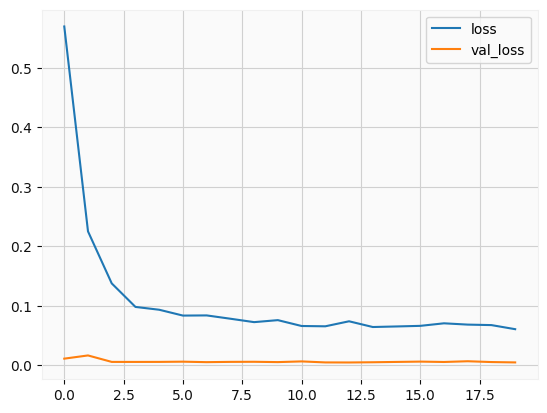

In [47]:
losses = pd.DataFrame(model.history.history)
losses.plot()

[-0.00386071] [-0.02278538]
[0.00175686] [-0.05792267]
[0.00404669] [-0.02751529]
[-0.00258637] [-0.01197382]
[-0.00530665] [0.00491917]
[-0.00457838] [-0.01940678]
[0.00208453] [-0.01433888]
[0.00476047] [-0.04339474]
[0.00543929] [-0.09474947]
[-0.00072152] [-0.10285799]


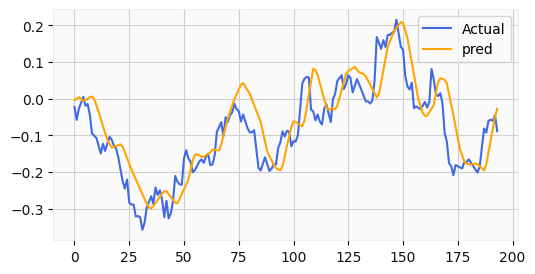

In [48]:
y_pred = model.predict(x_test)
for i in range(10):
 print(y_pred[i], y_test[i])
plt.figure(figsize=(6,3))
plt.plot(y_test, color = 'royalblue', label = 'Actual')
plt.plot(y_pred, color = 'orange', label = 'pred')
plt.legend()
plt.show()